# Задание 1

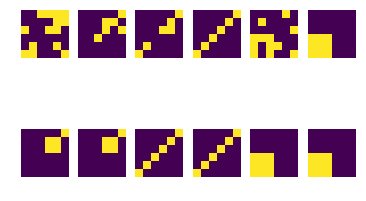

In [13]:
%run Lab5.py
%matplotlib inline

## Использование neupy

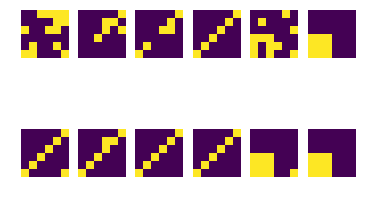

In [14]:
from neupy import algorithms
import matplotlib.pyplot as pl
import numpy as np
import Lab5 as lab5

dhnet = algorithms.DiscreteHopfieldNetwork(mode='async')
t=np.matrix([[1 if j==1 else 0 for j in i] for i in lab5.train])

dhnet.train(t)
test=(np.matrix(lab5.check[5]).ravel()+1)/2
res=dhnet.predict(test)
fig,axs=pl.subplots(2,6)
for i in range(6):
    test=(np.matrix(lab5.check[i]).ravel()+1)/2
    res=dhnet.predict(test)
    axs[0,i].imshow(test.reshape(6,6))
    axs[1,i].imshow(res.reshape(6,6))
    axs[0,i].axis('off')
    axs[1,i].axis('off')



# Задание 2

Additive:48.60% Multiplicative:17.80% WithoutNoize:74.70%
 {(-1, -1, 1, 1): 247, (-1, -1, 1, -1): 255, (-1, -1, -1, 1): 245}


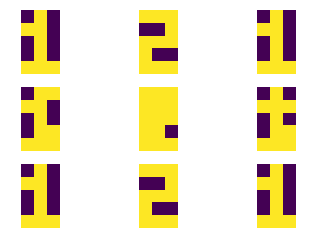

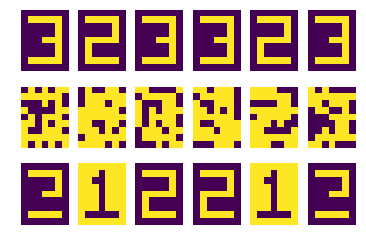

<Figure size 432x288 with 0 Axes>

In [15]:
%run Lab5_1.py

## Использование neupy

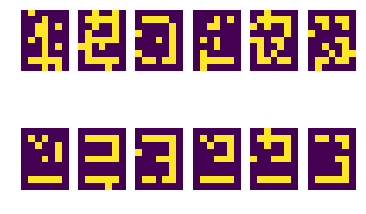

In [16]:
from neupy import algorithms
import matplotlib.pyplot as pl
import numpy as np
import Lab5_1 as lab5

dhnet = algorithms.DiscreteHopfieldNetwork(mode='async')
t=np.matrix([[1 if j==1 else 0 for j in i] for i in lab5.train.values()])

dhnet.train(t)
test=(np.matrix(lab5.check[5]).ravel()+1)/2
res=dhnet.predict(test)
fig,axs=pl.subplots(2,6)
for i in range(6):
    test=(np.matrix(lab5.check[i]).ravel()+1)/2
    res=dhnet.predict(test)
    axs[0,i].imshow(test.reshape(9,7))
    axs[1,i].imshow(res.reshape(9,7))
    axs[0,i].axis('off')
    axs[1,i].axis('off')



# Задание 3

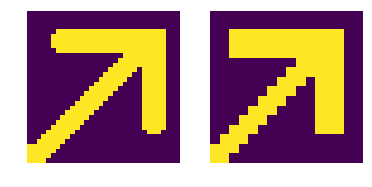

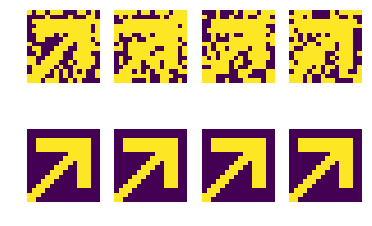

<Figure size 432x288 with 0 Axes>

In [17]:
%run Lab5_2.py